<a href="https://colab.research.google.com/github/gabrielcgo/modulo03/blob/main/modulo03_projeto03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 03** / *Módulo 03*

Essa análise é uma atividade proposta pela Blue EdTech com o objetivo de aplicação prática dos conteúdos ensinados para obtenção parcial da nota do módulo 03.

A atividade é composta por 4 questões práticas que serão resolvidas ao decorrer desta apresentação.

# Calling Spacy

Para realizar a análise desse dataset iremos instalar a biblioteca SpaCy.

O SpaCy é uma biblioteca gratuita e de código aberto para processamento avançado de linguagem natural (NLP) em Python.

Se você estiver trabalhando com muito texto, eventualmente desejará saber mais sobre ele. Por exemplo, do que se trata? O que as palavras significam no contexto? Quem está fazendo o que para quem? Quais empresas e produtos são mencionados? Quais textos são semelhantes entre si?

O spaCy foi projetado especificamente para uso em produção e ajuda você a criar aplicativos que processam e “entendem” grandes volumes de texto. Ele pode ser usado para extrair informações ou criar sistemas de compreensão de linguagem natural, ou ainda pré-processar um texto para Deep Learning.

In [1]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.2 MB 5.1 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 660 kB 6.4 MB/s 
     |████████████████████████████████| 10.1 MB 48.5 MB/s 
     |████████████████████████████████| 457 kB 39.2 MB/s 
     |████████████████████████████████| 181 kB 24.5 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsl

In [2]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.9 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Import modules

*   Para carregar o Dataset, ultilizamos o Pandas
*   O Numpy para trabalhar com arrays
*   O Seaborn para visualizar gráficos
*   SpaCy (já citado) para trabalhar com processamento de linguagem
*   Sklearn para estatística e Machine Learning
*   Collections para realizar contagem de Tokens


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import spacy
import spacy.cli

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

nlp = spacy.load("en_core_web_sm")
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Starting Analysis

Efetivamente vamos iniciar a nossa análise.

**SOBRE ESSE DATASET:**

Os dados a seguir destinam-se ao avanço da pesquisa de análise de sentimento financeiro. São dois conjuntos de dados (FiQA, Financial PhraseBank) combinados em um arquivo CSV fácil de usar. Ele fornece frases financeiras com rótulos de sentimento.

**CITAÇÕES:**

Malo, Pekka, et al. "Good debt or bad debt: Detecting semantic orientations in economic texts." Journal of the Association for Information Science and Technology 65.4 (2014): 782-796.

In [55]:
# Carregando o Dataset

df = pd.read_csv('data.csv')

In [5]:
# Uma breve visualização do que estamos analisando

df.info

<bound method DataFrame.info of                                                Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]>

In [6]:
# Como esse dataset se apresenta

df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


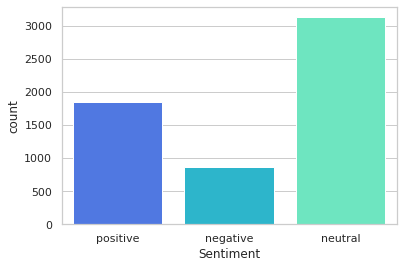

In [7]:
# Para termos uma ideia dos dados da nossa variável Target, vamos chamar um gráfico de barras para a variável Sentiment

print(df["Sentiment"].value_counts())

sns.set_theme(style="whitegrid")
sns.set_palette('rainbow')
sns.countplot(x="Sentiment",data=df);

Nossa primeira análise nos mostra que os dados estão desbalanceados, como temos um número alto de Neutros e baixo de Negativos, pode ocorrer do nosso modelo não conseguir prever bem se uma sentença é negativa e acabar predizendo como neutra. Iremos analisar esse tópico mais afundo conforme formos avançando.

# 1. Construa as funções e a pipeline, separe os dados em treino e teste, execute a pipeline para classificar em positivo, negativo e neutro. Quais foram os valores de acurácia, precisão e sensitividade deste modelo? (3.0 pontos)

In [8]:
texto = df.Sentence[42]

print('--------------')
print('Texto original')
print(texto)

doc = nlp(texto)
tokens_filtrado = [token for token in doc if ((not token.is_stop) & (not token.is_punct))]

print('--------------')
print('Remoção de stopwords e pontuação')
print(tokens_filtrado)

lemmas = [token.lemma_.lower().strip() for token in tokens_filtrado]

print('--------------')
print('Lemmatization')
print(lemmas)

--------------
Texto original
InterContinental Hotels first-quarter global room revenue lags estimates
--------------
Remoção de stopwords e pontuação
[InterContinental, Hotels, quarter, global, room, revenue, lags, estimates]
--------------
Lemmatization
['intercontinental', 'hotels', 'quarter', 'global', 'room', 'revenue', 'lag', 'estimate']


In [9]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

In [10]:
def clean_text(texto):     
    return texto.strip().lower()

In [11]:
def tokenizer(texto):
    doc = nlp(texto)
    tokens = [token for token in doc if ((not token.is_stop) & (not token.is_punct))]
    tokens = [token.lemma_.lower().strip() for token in tokens]
    return tokens

In [12]:
vectorizer = CountVectorizer(tokenizer = tokenizer, ngram_range=(1,1)) 

**Como modelo, foi escolhido SVM (Support vector machine)**

O SVM é uma técnica de classificação baseada em aprendizado de máquina na qual é utilizado o aprendizado supervisionado para classificação, regressão e detecção de outliers.. Isso quer dizer que para seu treinamento deve se possuir uma base na qual as instâncias de cada classe estejam previamente classificadas, como ocorre nesse dataset.

As vantagens das máquinas de vetores de suporte são:

*   Eficaz em espaços de alta dimensão.
*   Ainda eficaz nos casos em que o número de dimensões é maior que o número de amostras.
*   Usa um subconjunto de pontos de treinamento na função de decisão (chamados vetores de suporte), portanto, também é eficiente em termos de memória.
*   Versátil: diferentes funções do Kernel podem ser especificadas para a função de decisão. Kernels comuns são fornecidos, mas também é possível especificar kernels personalizados.

*FONTE: Dpto de Computação UFOP, Scikit Learn.*

In [13]:
classifier = SVC(random_state=10)

# É importante manter o randon_state aqui também para o teste sempre dar o mesmo resultado

In [56]:
X = df.Sentence
y = df.Sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Acurácia do modelo: ', round(accuracy_score(y_test, y_pred), 3))
print('Precisão do modelo: ', round(precision_score(y_test, y_pred, average='macro'), 3))
print('Sensibilidade do modelo: ', round(recall_score(y_test, y_pred, average='macro'), 3))

# OBS: Uma base de teste de apenas 10% apresentou resultados superiores, por mais contraditrório que seja... ¯\_(ツ)_/¯

Acurácia do modelo:  0.691
Precisão do modelo:  0.578
Sensibilidade do modelo:  0.561


# 2. Use o seu modelo para classificar os seguintes textos extraídos do site Financial Times. Faça uma tabela com o valor esperado e o valor obtido, e responda: houve divergência entre o esperado e o obtido? O que poderia ser feito para corrigir? (1.0 ponto)

In [15]:
# Carregando as sentenças solicitadas e criando um dataframe com elas

new_sentences = ['Central banks’ rate rises, geopolitical risk and slowing growth trigger investors’ stampede for safety.', 
                 'China opens up bond market in bid to woo foreign investors',
                 'HM Revenue & Customs says residents had £850bn in accounts overseas but it does not estimate if tax paid on this.', 
                 'Japan’s horrifying crop of data falsification is also encouraging. The scandals have emerged from a distinct new phase in the evolution of the country’s shareholder capitalism.',
                 'Despite internal problems, the group continues to exert a tight grip on the US’s gun control debate']

pd.DataFrame(new_sentences, columns =['Sentence'])

,Sentence
0,"Central banks’ rate rises, geopolitical risk a..."
1,China opens up bond market in bid to woo forei...
2,HM Revenue & Customs says residents had £850bn...
3,Japan’s horrifying crop of data falsification ...
4,"Despite internal problems, the group continues..."


In [16]:
new_pred = pipe.predict(new_sentences)

print(new_pred)

['positive' 'neutral' 'neutral' 'neutral' 'neutral']


Infelizmente o modelo não soube prever bem...
*   Sequência correta: *NEGATIVE, NEUTRAL, NEGATIVE, NEGATIVE, NEUTRAL*
*   Sequência obtida: *POSITIVE, NEUTRAL, NEUTRAL, NEUTRAL, NEUTRAL*

Acertou apenas 2/5.
Existem algumas hipóteses que podem ter levado à esse resultado:


1.   O modelo não foi adequado
2.   O acurácia não foi alta o suficiente / a sensibilidade do modelo foi baixa
3.   Desbalanceamento dos dados (Conforme dito no início)

Para validar essas hipóteses, vamos tentar com outro modelo.



**Como segundo modelo, foi escolhido a Floresta Aleatória (Random Forest)**

Floresta Aleatória (Random Forest) é um algoritmo de aprendizagem de máquina flexível e fácil de usar que produz excelentes resultados a maioria das vezes, mesmo sem ajuste de hiperparâmetros. É também um dos algoritmos mais utilizados, devido à sua simplicidade e o fato de que pode ser utilizado para tarefas de classificação e também de regressão.

FONTE: *Medium*

In [57]:
classifier = RandomForestClassifier(random_state=10)

pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Acurácia do modelo: ', round(accuracy_score(y_test, y_pred), 3))
print('Precisão do modelo: ', round(precision_score(y_test, y_pred, average='macro'), 3))
print('Sensibilidade do modelo: ', round(recall_score(y_test, y_pred, average='macro'), 3))

Acurácia do modelo:  0.691
Precisão do modelo:  0.578
Sensibilidade do modelo:  0.561


In [18]:
# Segunda tentativa

new_pred = pipe.predict(new_sentences)

print(new_pred)

['positive' 'neutral' 'neutral' 'neutral' 'neutral']


**A hipótese 3 pode ser validada:**

3.   Desbalanceamento dos dados (Conforme dito no início)

# 3. Faça uma análise exploratória, onde identifique as três empresas mais citadas e quantifique os níveis de positividade, negatividade e neutralidade dos textos sobre estas empresas. (3.0 pontos)

a. Extraia de todos os textos as entidades, há quantas entidades? (0.6 pontos) 

R: 14.467 entidades detectadas.

In [24]:
entities = 0

for row in range(df.shape[0]):
  doc = nlp(df.Sentence[row])
  for ent in doc.ents:
    entities += 1

print('Ao total foram citadas ', entities, 'entidades')

Ao total foram citadas  14467 entidades


b. Quantas entidades são empresas? (0.6 pontos)

R: 2166 são empresas

In [58]:
contorg = 0
listorg = []


for token in df.Sentence.index:
    texto1 = df.Sentence[token]
    doc1 = nlp(texto1)
    for ent in doc1.ents:
      if ent.label_ == 'ORG':
        print(ent.text, ent.label_)
        listorg.append(ent.text)


number_of_unique_elements = len(set(listorg))
print('Ao total ', number_of_unique_elements, ' são empresas')

GeoSolutions ORG
Location Based Search Technology ORG
ESI ORG
BK ORG
SPY ORG
Shell ORG
SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE ORG
Company ORG
Kone ORG
Stockmann ORG
Stockmann ORG
ORCL ORG
Ahlstrom Corporation STOCK EXCHANGE ORG
Ahlstrom Corporation ORG
SQL Server Premium ORG
Tehtaat ORG
the Nasdaq OMX Helsinki Ltd. ORG
Baxalta ORG
Fiskars ORG
Stockmann ORG
AB Lindex ORG
HUHTAMAKI OYJ STOCK EXCHANGE RELEASE ORG
Huhtamaki 's Capital Markets Day ORG
Royal Dutch Shell ORG
Buy BG Group ORG
FinancialWire ORG
Dolce & Gabbana ORG
the European Union ORG
Marimekko Corporation 's ORG
InterContinental Hotels ORG
L&G ORG
Lagardere ORG
Tesco ORG
Sentera ORG
EPS ORG
Tata Steel ORG
Employment and Economic Development Centres ORG
STZ ORG
CELG ORG
GeoSentric ORG
Cohen & Steers , Inc. ORG
Kauko-Telko 's ORG
Group ORG
Gazprom-Shell ORG
Pekka Eloholma ORG
EUR ORG
Nokia ORG
Tesco ORG
SFO ORG
http://stks.co/tMU ORG
GS Engineering ORG
LNG ORG
the Trade Register ORG
Lember ORG
the Social Affairs Minis

c. Quais são as três empresas mais citadas? (0.6 pontos)

R:

1.   Nokia (75x)
2.   Tesco (29x)
3.   Finnair (27x)



In [20]:
# achar empresas mais citadas

def most_frequent(listorg):
    occurence_count = Counter(listorg)
    return occurence_count.most_common()
  
print(most_frequent(listorg))

[('Nokia', 75), ('EUR', 72), ('EPS', 60), ('Group', 33), ('OMX', 31), ('Tesco', 29), ('Finnair', 27), ('HEL', 21), ('Scanfil', 21), ('Company', 20), ('Cargotec', 19), ('UPM', 18), ('AAPL', 16), ('TeliaSonera', 15), ('Nokia Siemens Networks', 15), ('Metso', 15), ('SABMiller', 14), ('the Board of Directors', 14), ('Stockmann', 13), ('Talentum', 13), ('+358', 12), ('NYSE', 11), ('Tikkurila', 11), ('Huhtamaki', 10), ('Microsoft', 10), ('Vaisala', 10), ('Nordea', 10), ('Shell', 9), ('HELSINKI', 9), ('Apple', 9), ('FDA', 9), ('YIT', 9), ('Olvi', 9), ('Helsinki', 9), ('Okmetic', 9), ('Tiimari', 9), ('Outokumpu', 9), ('RBS', 8), ('Citycon', 8), ('Finnish Bank', 8), ('Finnlines', 8), ('Board', 8), ('Orion', 8), ('EBITDA', 8), ('EU', 8), ('Elcoteq', 8), ('Tehtaat', 7), ('AstraZeneca', 7), ('Ahlstrom', 7), ('Sainsbury', 7), ('NFLX', 7), ('Royal Mail', 7), ('Cramo', 7), ('Marimekko', 7), ('Elisa', 7), ('Sampo Bank', 7), ('Fiskars', 6), ('LNG', 6), ('the Trade Register', 6), ('HKScan', 6), ('the No

 d. Faça uma tabela onde demonstre as três empresas mais citadas e o total de textos positivos, negativos e neutros de cada uma. (1.2 pontos)

In [47]:
cleaning_list = ['EUR', 'EPS', 'Group', 'OMX', 'Company', 'Location Based Search Technology']
orgs = {'entity': [], 'sentiment': []}
for row in range(df.shape[0]):
  doc = nlp(df.Sentence[row])
  new_labels = []
  index = -1
  for token in doc:
    index += 1

  for ent in doc.ents:
    if ent.label_ == 'ORG':
      orgs['entity'].append(ent.text)
      orgs['sentiment'].append(df.Sentiment[row])
    

ents = pd.DataFrame(orgs)
ents.head()

,entity,sentiment
0,GeoSolutions,positive
1,Location Based Search Technology,positive
2,ESI,negative
3,BK,negative
4,SPY,positive


In [49]:
# as 3 mais frequentes foram Nokia, Tesco e Finnair

most_quoted = ['Nokia', 'Tesco', 'Finnair']
sentiments = ['neutral', 'negative', 'positive']
total_values = {'Nokia': {}, 'Tesco': {}, 'Finnair': {}}

for brand in most_quoted:
  df = ents[ents['entity'] == brand]

  for sentiment in sentiments:
    count = df[df['sentiment'] == sentiment].value_counts()
    df_count = pd.DataFrame(count)
    df_count.reset_index(inplace=True)
    df_count.columns = ['entity', 'sentiment', 'count']
    df_count.drop(['entity', 'sentiment'], axis=1, inplace=True)
    total_values[brand][sentiment] = int(df_count['count'].to_string()[1:].strip())
  
total_values = pd.DataFrame(total_values)
total_values.reset_index(inplace=True)
total_values.columns = ['sentiment'] + most_quoted
total_values = total_values[[column for column in total_values if column not in ['sentiment']] + ['sentiment']] #rearranging the order of columns
total_values

,Nokia,Tesco,Finnair,sentiment
0,47,3,11,neutral
1,5,11,7,negative
2,23,15,9,positive


# 4. Faça gráficos a partir da tabela obtida acima. Descreva cada gráfico de forma que estivesse apresentando à diretoria dessas três empresas. (3.0 pontos)

Para essa atividade, foi decidido que a melhor visualização seriam gráficos de barras para mostrar separadamente cada sentença positiva, negativa ou neutra por empresa.

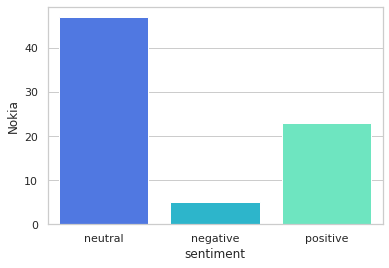

In [50]:
# Sobre a Nokia

sns.barplot(x='sentiment', y='Nokia', data=total_values)

Podemos observar que as menções do mercado financeiro que tangem à respeito da Nokia costumam ser majoritariamente neutras. É importante a ressaltar que também existem menções positivas em detrimento de poucas negativas.

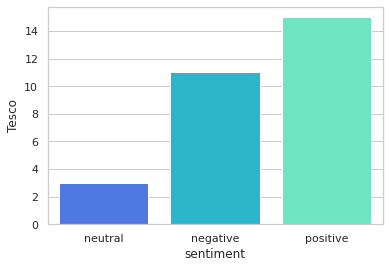

In [52]:
# Sobre a Tesco

sns.barplot(x='sentiment', y='Tesco', data=total_values)

Neste caso podemos observar que as menções do mercado financeiro que tangem à respeito da Tesco são relativamente equilibradas entre positivas com leve destaque frente as negativas. Neutras estão em menores casos.

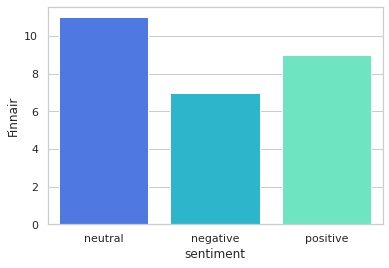

In [53]:
# Sobre a Finnair

sns.barplot(x='sentiment', y='Finnair', data=total_values)

Sobre a Finnair, podemos observar que as menções do mercado financeiro que  são um tanto equilibradas entre positivas, negativas e neutras, sendo esta última apenas 30% em maior destaque frente às menções negativas.